In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

# Get CSV Files

In [2]:
df_2015 = pd.read_csv('data_source/2015.csv')
df_2016 = pd.read_csv('data_source/2016.csv')
df_2017 = pd.read_csv('data_source/2017.csv')
df_2018 = pd.read_csv('data_source/2018.csv')
df_2019 = pd.read_csv('data_source/2019.csv')

# Data preprocessing
- Changing all columns of each table to apprpriate names
- Common columns: ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']
- Add year column
- Merge all tables

In [3]:
# check column names
# drop Region, Happiness Rank, Standard Error, Dystopia Residual columns
# change names where appropriate
df_2015.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [4]:
# drop Region, Happiness Rank, Lower Confidence Interval, 
# Upper Confidence Interval, Dystopia Residual columns
# change names where appropriate
df_2016.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Lower Confidence Interval',
 'Upper Confidence Interval',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [5]:
# drop Happiness.Rank, Whisker.high, 
# whisker.low, Dystopia Residual columns
# change names where appropriate
df_2017.columns.tolist()

['Country',
 'Happiness.Rank',
 'Happiness.Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual']

In [6]:
# drop Overall rank column
# change names where appropriate
df_2018.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [7]:
# drop Overall rank column
# change names where appropriate
df_2019.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [8]:
df_2015 = df_2015.drop(columns = ['Region', 'Happiness Rank', 'Standard Error', 'Dystopia Residual'])
df_2015.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']
df_2015.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
df_2016 = df_2016.drop(columns = ['Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])
df_2016.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']
df_2016.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [10]:
df_2017 = df_2017.drop(columns = ['Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Dystopia.Residual'])
df_2017.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2017 = df_2017.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])
df_2017.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [11]:
df_2018 = df_2018.drop(columns = ['Overall rank'])
df_2018.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2018 = df_2018.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])   
df_2018.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [12]:
df_2019 = df_2019.drop(columns = ['Overall rank'])
df_2019.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2019 = df_2019.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])
df_2019.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322


# Insert code to load into database on PgAdmin4

# Check Linearity
- Test to see if there is a linear relationship between factors (Economy, Social Support, Life Expectancy, Freedom, Perceptions of Corruption and Generosity) and Happiness Score

## Economy 

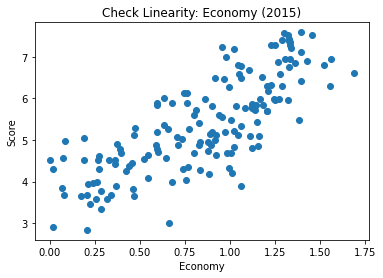

In [70]:
# Check Linearity: Economy vs Score (2015)
plt.scatter(df_2015.Economy, df_2015.Score)
plt.title('Check Linearity: Economy (2015)')
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Economy and Happiness Score

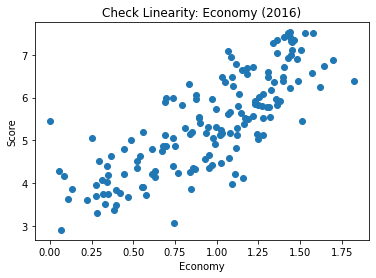

In [71]:
# Check Linearity: Economy vs Score (2016)
plt.scatter(df_2016.Economy, df_2016.Score)
plt.title('Check Linearity: Economy (2016)')
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Economy and Happiness Score

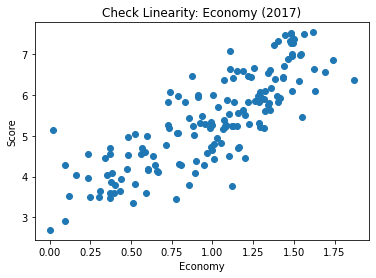

In [72]:
# Check Linearity: Economy vs Score (2017)
plt.scatter(df_2017.Economy, df_2017.Score)
plt.title('Check Linearity: Economy (2017)')
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Economy and Happiness Score

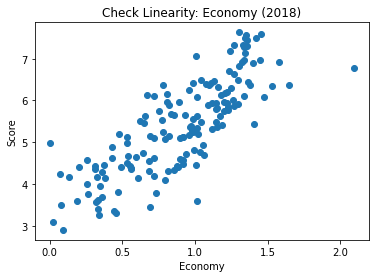

In [73]:
# Check Linearity: Economy vs Score (2018)
plt.scatter(df_2018.Economy, df_2018.Score)
plt.title('Check Linearity: Economy (2018)')
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Economy and Happiness Score

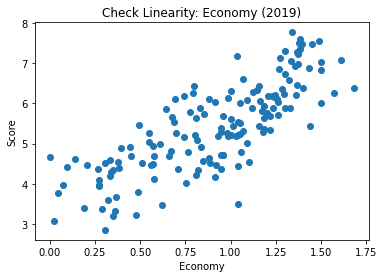

In [74]:
# Check Linearity: Economy vs Score (2019)
plt.scatter(df_2019.Economy, df_2019.Score)
plt.title('Check Linearity: Economy (2019)')
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Economy and Happiness Score

## Social Support

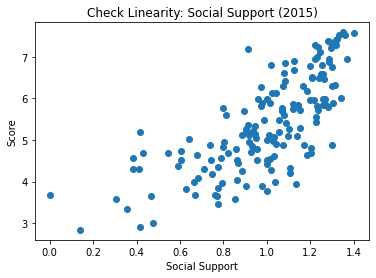

In [82]:
# Check Linearity: Social Support vs Score (2015)
plt.scatter(df_2015.Social_Support, df_2015.Score)
plt.title('Check Linearity: Social Support (2015)')
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Social Support and Happiness Score

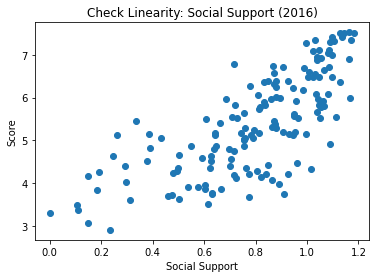

In [83]:
# Check Linearity: Social Support vs Score (2016)
plt.scatter(df_2016.Social_Support, df_2016.Score)
plt.title('Check Linearity: Social Support (2016)')
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Social Support and Happiness Score

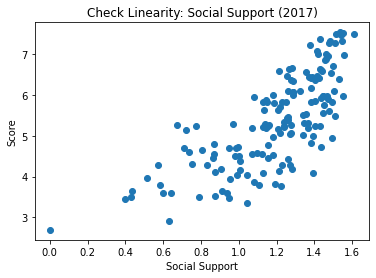

In [84]:
# Check Linearity: Social Support vs Score (2017)
plt.scatter(df_2017.Social_Support, df_2017.Score)
plt.title('Check Linearity: Social Support (2017)')
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Social Support and Happiness Score

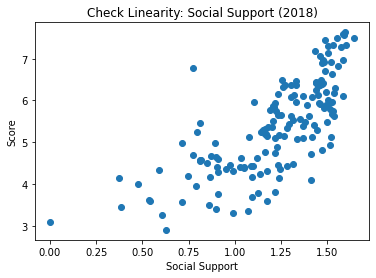

In [85]:
# Check Linearity: Social Support vs Score (2018)
plt.scatter(df_2018.Social_Support, df_2018.Score)
plt.title('Check Linearity: Social Support (2018)')
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Social Support and Happiness Score

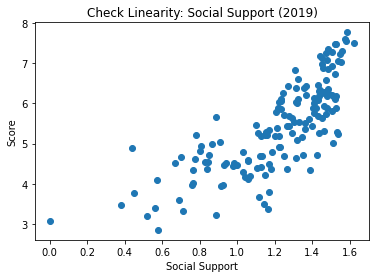

In [86]:
# Check Linearity: Social Support vs Score (2019)
plt.scatter(df_2019.Social_Support, df_2019.Score)
plt.title('Check Linearity: Social Support (2019)')
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Social Support and Happiness Score

## Life Expectancy

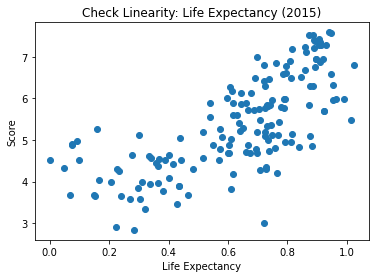

In [80]:
# Check Linearity: Life Expectancy vs Score (2015)
plt.scatter(df_2015.Life_Expectancy, df_2015.Score)
plt.title('Check Linearity: Life Expectancy (2015)')
plt.xlabel('Life Expectancy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Life Expectancy and Happiness Score

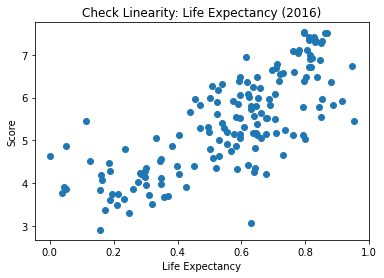

In [87]:
# Check Linearity: Life Expectancy vs Score (2016)
plt.scatter(df_2016.Life_Expectancy, df_2016.Score)
plt.title('Check Linearity: Life Expectancy (2016)')
plt.xlabel('Life Expectancy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Life Expectancy and Happiness Score

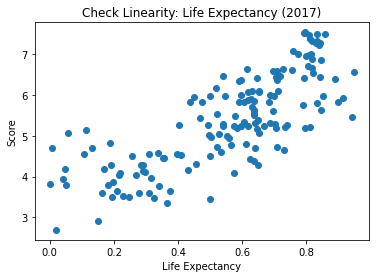

In [88]:
# Check Linearity: Life Expectancy vs Score (2017)
plt.scatter(df_2017.Life_Expectancy, df_2017.Score)
plt.title('Check Linearity: Life Expectancy (2017)')
plt.xlabel('Life Expectancy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Life Expectancy and Happiness Score

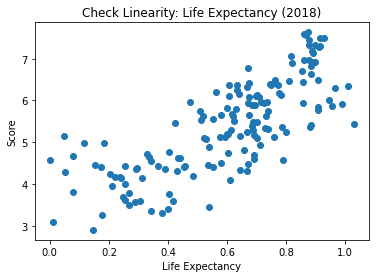

In [89]:
# Check Linearity: Life Expectancy vs Score (2018)
plt.scatter(df_2018.Life_Expectancy, df_2018.Score)
plt.title('Check Linearity: Life Expectancy (2018)')
plt.xlabel('Life Expectancy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Life Expectancy and Happiness Score

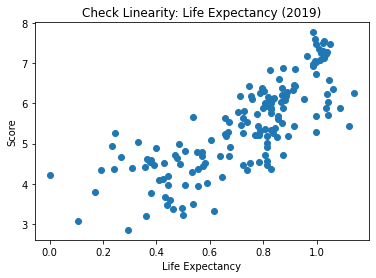

In [90]:
# Check Linearity: Life Expectancy vs Score (2019)
plt.scatter(df_2019.Life_Expectancy, df_2019.Score)
plt.title('Check Linearity: Life Expectancy (2019)')
plt.xlabel('Life Expectancy')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Life Expectancy and Happiness Score

## Freedom

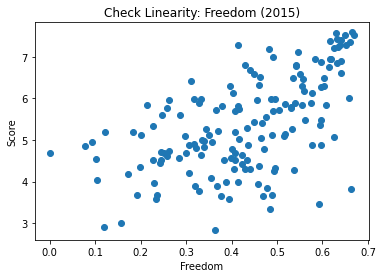

In [91]:
# Check Linearity: Freedom vs Score (2015)
plt.scatter(df_2015.Freedom, df_2015.Score)
plt.title('Check Linearity: Freedom (2015)')
plt.xlabel('Freedom')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Freedom and Happiness Score

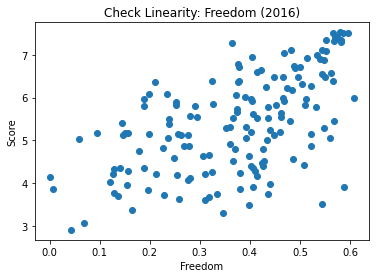

In [92]:
# Check Linearity: Freedom vs Score (2016)
plt.scatter(df_2016.Freedom, df_2016.Score)
plt.title('Check Linearity: Freedom (2016)')
plt.xlabel('Freedom')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Freedom and Happiness Score

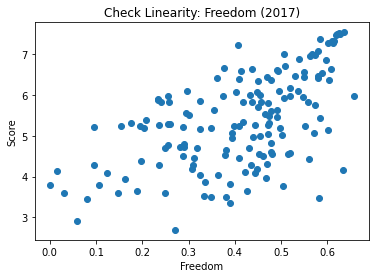

In [93]:
# Check Linearity: Freedom vs Score (2017)
plt.scatter(df_2017.Freedom, df_2017.Score)
plt.title('Check Linearity: Freedom (2017)')
plt.xlabel('Freedom')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Freedom and Happiness Score

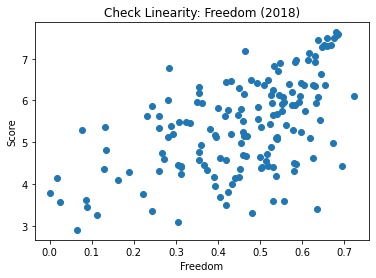

In [94]:
# Check Linearity: Freedom vs Score (2018)
plt.scatter(df_2018.Freedom, df_2018.Score)
plt.title('Check Linearity: Freedom (2018)')
plt.xlabel('Freedom')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Freedom and Happiness Score

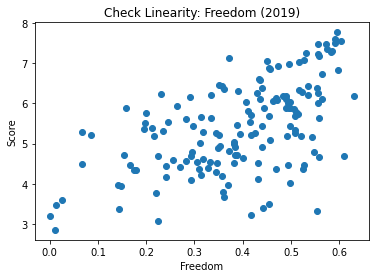

In [95]:
# Check Linearity: Freedom vs Score (2019)
plt.scatter(df_2019.Freedom, df_2019.Score)
plt.title('Check Linearity: Freedom (2019)')
plt.xlabel('Freedom')
plt.ylabel('Score')
plt.show()

Result: There is a linear relationship between Freedom and Happiness Score

## Perceptions of Corruption

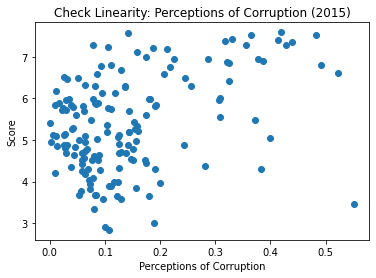

In [96]:
# Check Linearity: Perceptions of Corruption vs Score (2015)
plt.scatter(df_2015.Perceptions_of_Corruption, df_2015.Score)
plt.title('Check Linearity: Perceptions of Corruption (2015)')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Score')
plt.show()

Result: There is not a linear relationship between Perceptions of Corruption and Happiness Score

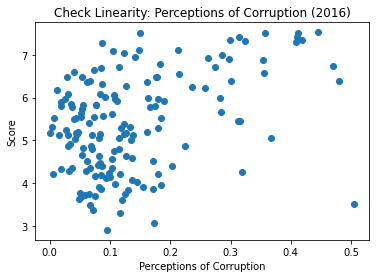

In [97]:
# Check Linearity: Perceptions of Corruption vs Score (2016)
plt.scatter(df_2016.Perceptions_of_Corruption, df_2016.Score)
plt.title('Check Linearity: Perceptions of Corruption (2016)')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Score')
plt.show()

Result: There is not a linear relationship between Perceptions of Corruption and Happiness Score

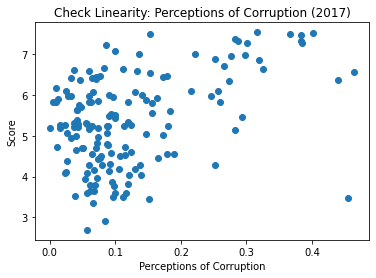

In [98]:
# Check Linearity: Perceptions of Corruption vs Score (2017)
plt.scatter(df_2017.Perceptions_of_Corruption, df_2017.Score)
plt.title('Check Linearity: Perceptions of Corruption (2017)')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Score')
plt.show()

Result: There is not a linear relationship between Perceptions of Corruption and Happiness Score

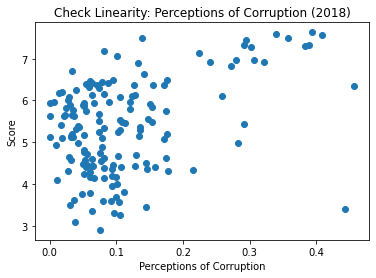

In [99]:
# Check Linearity: Perceptions of Corruption vs Score (2018)
plt.scatter(df_2018.Perceptions_of_Corruption, df_2018.Score)
plt.title('Check Linearity: Perceptions of Corruption (2018)')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Score')
plt.show()

Result: There is not a linear relationship between Perceptions of Corruption and Happiness Score

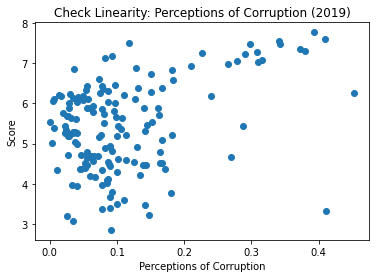

In [100]:
# Check Linearity: Perceptions of Corruption vs Score (2019)
plt.scatter(df_2019.Perceptions_of_Corruption, df_2019.Score)
plt.title('Check Linearity: Perceptions of Corruption (2019)')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Score')
plt.show()

Result: There is not a linear relationship between Perceptions of Corruption and Happiness Score

## Generosity

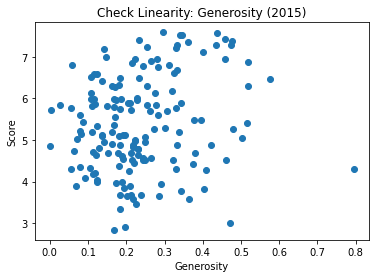

In [101]:
# Check Linearity: Generosity vs Score (2015)
plt.scatter(df_2015.Generosity, df_2015.Score)
plt.title('Check Linearity: Generosity (2015)')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

Result: There is not a linear relationship between Generosity and Happiness Score

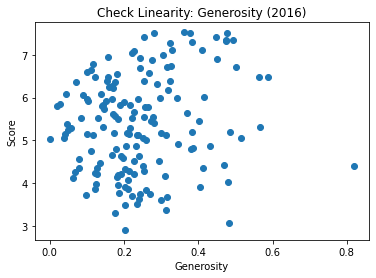

In [102]:
# Check Linearity: Generosity vs Score (2016)
plt.scatter(df_2016.Generosity, df_2016.Score)
plt.title('Check Linearity: Generosity (2016)')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

Result: There is not a linear relationship between Generosity and Happiness Score

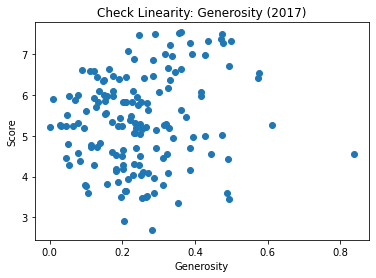

In [103]:
# Check Linearity: Generosity vs Score (2017)
plt.scatter(df_2017.Generosity, df_2017.Score)
plt.title('Check Linearity: Generosity (2017)')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

Result: There is not a linear relationship between Generosity and Happiness Score

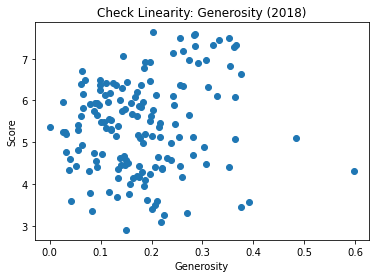

In [104]:
# Check Linearity: Generosity vs Score (2018)
plt.scatter(df_2018.Generosity, df_2018.Score)
plt.title('Check Linearity: Generosity (2018)')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

Result: There is not a linear relationship between Generosity and Happiness Score

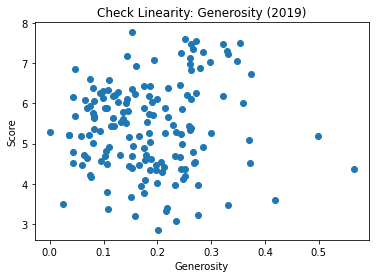

In [105]:
# Check Linearity: Generosity vs Score (2019)
plt.scatter(df_2019.Generosity, df_2019.Score)
plt.title('Check Linearity: Generosity (2019)')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

Result: There is not a linear relationship between Generosity and Happiness Score

# Linear Regression (2015) 
Test to see if there is a correlation between Economy and Happiness Score

In [76]:
# Split dependent and independent variables
X = df_2015.Economy.values.reshape(-1, 1)
X.shape

(158, 1)

In [77]:
y = df_2015.Score.values.reshape(-1, 1)

In [78]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [79]:
# Build Linear Regression model 
model = LinearRegression()

In [80]:
# Fit Linear Regression to the Training set
model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Training Prediction
y_pred = model.predict(X_train)
print(y_pred.shape)

(105, 1)


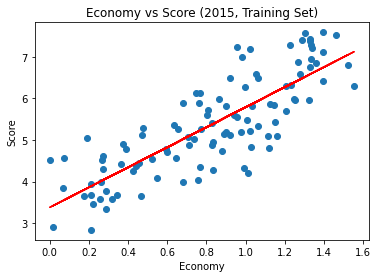

[[2.21822712]]


In [98]:
# Plot Training Prediction 
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.title("Economy vs Score (2015, Training Set)")
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

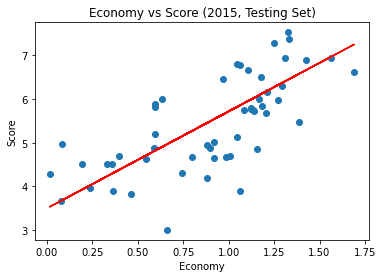

[[2.21822712]]


In [99]:
# Visualize Test Results 
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.title("Economy vs Score (2015, Testing Set)")
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

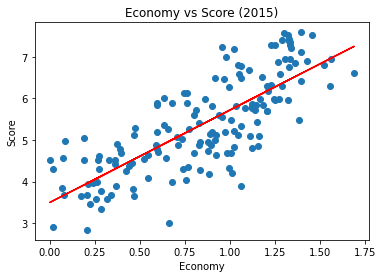

[[2.21822712]]


In [100]:
# Visualize Results 
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Economy vs Score (2015)")
plt.xlabel('Economy')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

In [91]:
# Predict Score With Economy of 0.25
model.predict([[0.25]])

array([[3.9825876]])

## Social Support

Test to see if there is a correlation between Social Support and Happiness Score

### 2015

In [101]:
# Split dependent and independent variables
X = df_2015.Social_Support.values.reshape(-1, 1)
X.shape

(158, 1)

In [102]:
y = df_2015.Score.values.reshape(-1, 1)

In [103]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [104]:
# Build Linear Regression model 
model = LinearRegression()

In [105]:
# Fit Linear Regression to the Training set
model.fit(X_train, y_train)

LinearRegression()

In [106]:
# Training Prediction
y_pred = model.predict(X_train)
print(y_pred.shape)

(105, 1)


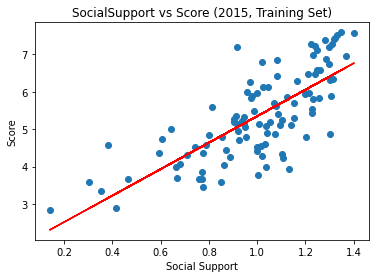

[[3.53161274]]


In [107]:
# Plot Training Prediction 
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.title("SocialSupport vs Score (2015, Training Set)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

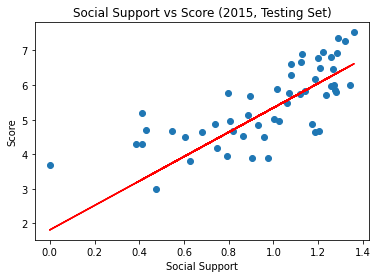

[[3.53161274]]


In [108]:
# Visualize Test Results 
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.title("Social Support vs Score (2015, Testing Set)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

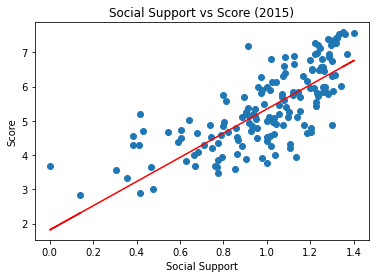

[[3.53161274]]


In [109]:
# Visualize Results 
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Social Support vs Score (2015)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

In [111]:
# Predict Score With Economy of 1
model.predict([[1]])

array([[5.34470812]])

### 2016

In [115]:
# Split dependent and independent variables
X = df_2016.Social_Support.values.reshape(-1, 1)
X.shape

(157, 1)

In [116]:
y = df_2016.Score.values.reshape(-1, 1)

In [117]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [118]:
# Build Linear Regression model 
model = LinearRegression()

In [119]:
# Fit Linear Regression to the Training set
model.fit(X_train, y_train)

LinearRegression()

In [120]:
# Training Prediction
y_pred = model.predict(X_train)
print(y_pred.shape)

(104, 1)


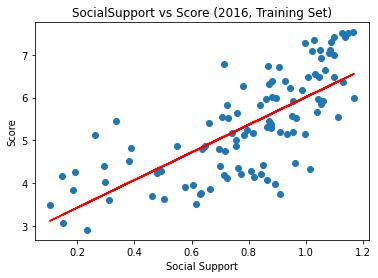

[[3.23312548]]


In [121]:
# Plot Training Prediction 
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.title("SocialSupport vs Score (2016, Training Set)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

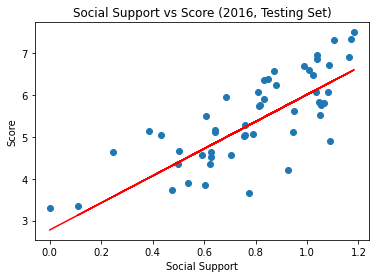

[[3.23312548]]


In [122]:
# Visualize Test Results 
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.title("Social Support vs Score (2016, Testing Set)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

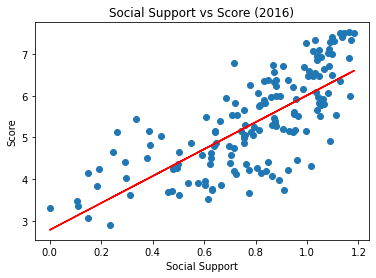

[[3.23312548]]


In [123]:
# Visualize Results 
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Social Support vs Score (2016)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

In [124]:
# Predict Score With Economy of 1
model.predict([[1]])

array([[6.01099355]])

### 2017

In [125]:
# Split dependent and independent variables
X = df_2017.Social_Support.values.reshape(-1, 1)
X.shape

(155, 1)

In [126]:
y = df_2017.Score.values.reshape(-1, 1)

In [127]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [128]:
# Build Linear Regression model 
model = LinearRegression()

In [129]:
# Fit Linear Regression to the Training set
model.fit(X_train, y_train)

LinearRegression()

In [130]:
# Training Prediction
y_pred = model.predict(X_train)
print(y_pred.shape)

(103, 1)


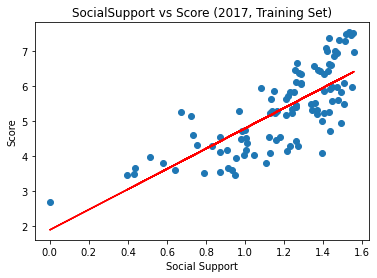

[[2.90365292]]


In [131]:
# Plot Training Prediction 
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.title("SocialSupport vs Score (2017, Training Set)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

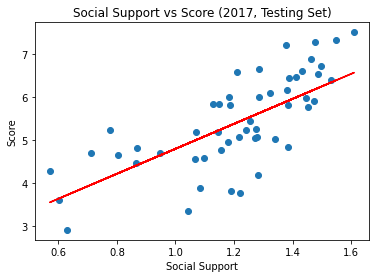

[[2.90365292]]


In [132]:
# Visualize Test Results 
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.title("Social Support vs Score (2017, Testing Set)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

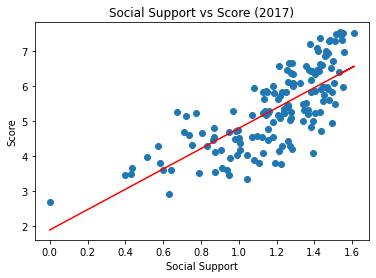

[[2.90365292]]


In [133]:
# Visualize Results 
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Social Support vs Score (2017)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

In [134]:
# Predict Score With Economy of 1
model.predict([[1]])

array([[4.79223773]])

### 2018

In [135]:
# Split dependent and independent variables
X = df_2018.Social_Support.values.reshape(-1, 1)
X.shape

(156, 1)

In [136]:
y = df_2018.Score.values.reshape(-1, 1)

In [137]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [138]:
# Build Linear Regression model 
model = LinearRegression()

In [139]:
# Fit Linear Regression to the Training set
model.fit(X_train, y_train)

LinearRegression()

In [140]:
# Training Prediction
y_pred = model.predict(X_train)
print(y_pred.shape)

(104, 1)


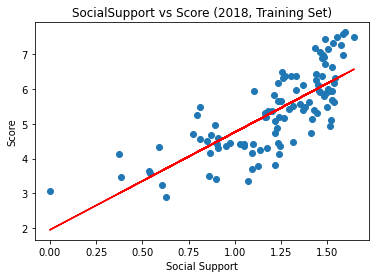

[[2.80904439]]


In [141]:
# Plot Training Prediction 
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.title("SocialSupport vs Score (2018, Training Set)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

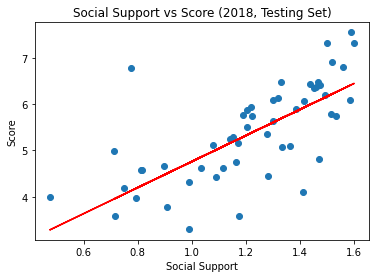

[[2.80904439]]


In [142]:
# Visualize Test Results 
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.title("Social Support vs Score (2018, Testing Set)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

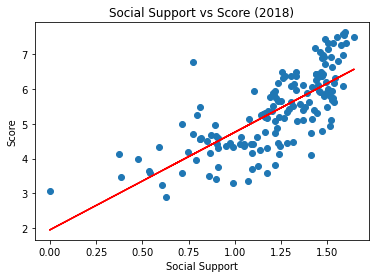

[[2.80904439]]


In [143]:
# Visualize Results 
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Social Support vs Score (2018)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

In [144]:
# Predict Score With Economy of 1
model.predict([[1]])

array([[4.76167325]])

### 2019

In [145]:
# Split dependent and independent variables
X = df_2019.Social_Support.values.reshape(-1, 1)
X.shape

(156, 1)

In [146]:
y = df_2019.Score.values.reshape(-1, 1)

In [147]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [148]:
# Build Linear Regression model 
model = LinearRegression()

In [149]:
# Fit Linear Regression to the Training set
model.fit(X_train, y_train)

LinearRegression()

In [150]:
# Training Prediction
y_pred = model.predict(X_train)
print(y_pred.shape)

(104, 1)


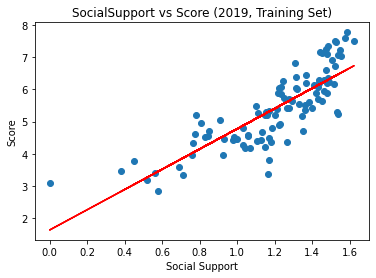

[[3.13618277]]


In [151]:
# Plot Training Prediction 
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.title("SocialSupport vs Score (2019, Training Set)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

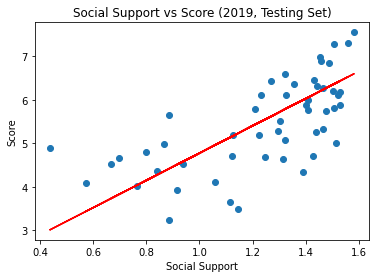

[[3.13618277]]


In [152]:
# Visualize Test Results 
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.title("Social Support vs Score (2019, Testing Set)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

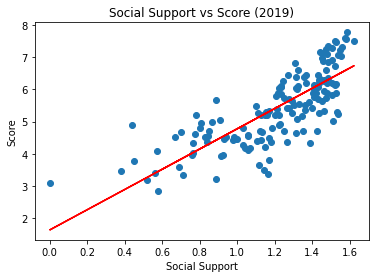

[[3.13618277]]


In [153]:
# Visualize Results 
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Social Support vs Score (2019)")
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.show()

# print slope of line
print(model.coef_)

In [154]:
# Predict Score With Economy of 1
model.predict([[1]])

array([[4.77592888]])

# Neural Network
Using all 6 factors: 

Economy, Social_Support, Life_Expectancy, Freedom, Perceptions_of_Corruption, Generosity

In [23]:
# Remove country and score from features data
y_2 = df_2015.Score
X_2 = df_2015.drop(columns=['Country', 'Score'])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=69)

In [24]:
# define Linear Regression model 
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# Evaluate the model
y_pred2 = model.score(X_test, y_test)
print(f" Linear regression model accuracy: {y_pred2:.3f}")

 Linear regression model accuracy: 0.769


In [25]:
# define basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(25, input_dim=6, activation='relu', kernel_initializer='he_uniform'))
nn_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile the Sequential model together and customize metrics
nn_model.compile(loss='mse', optimizer='adam')

# train model
fit_model = nn_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, verbose=0)

Train: 0.305, Test: 0.310


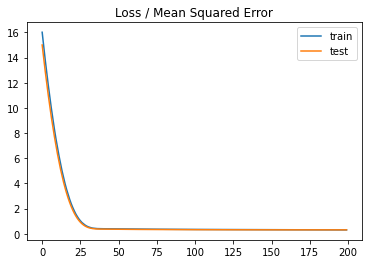

In [26]:
# evaluate the model
train_mse = nn_model.evaluate(X_train, y_train, verbose=0)
test_mse = nn_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(fit_model.history['loss'], label='train')
plt.plot(fit_model.history['val_loss'], label='test')
plt.legend()
plt.show()